In [1]:
!{sys.executable} -m pip install -v "opencv-python==4.5.1.48"
!{sys.executable} -m pip install matplotlib

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

Load image

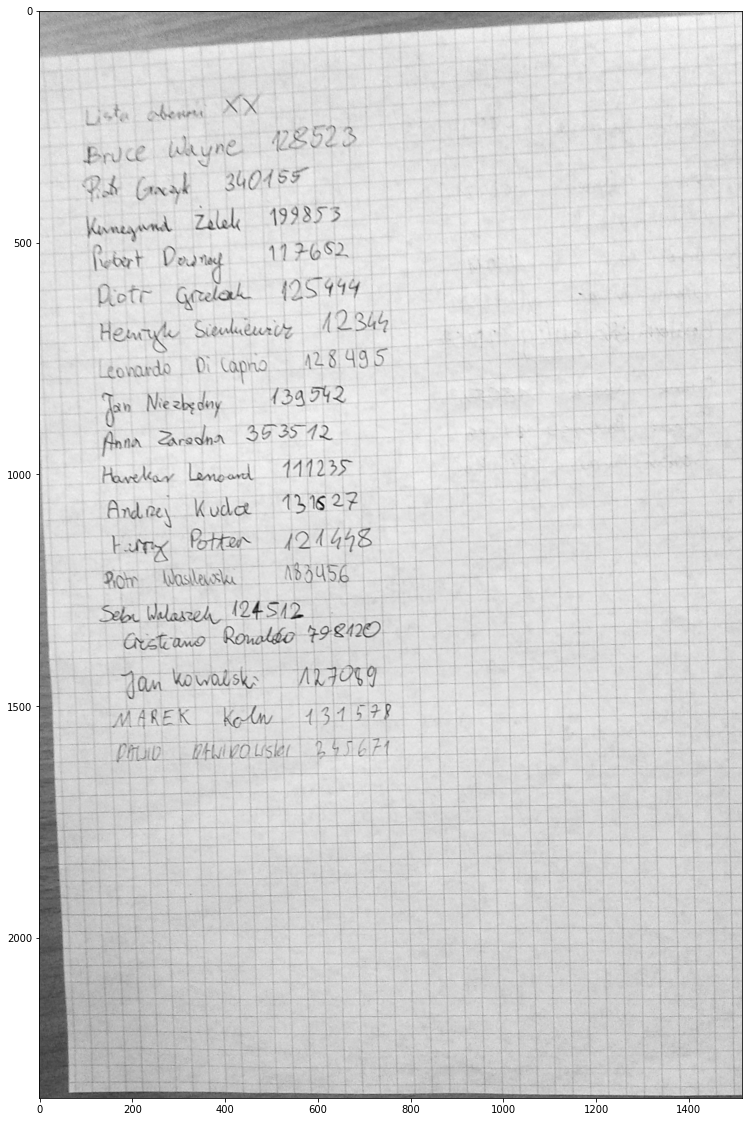

In [3]:
image_orig = cv.imread('straightened.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.imshow(image_orig, cmap='gray')
plt.show()

Denoise image and use Sobel edge detection

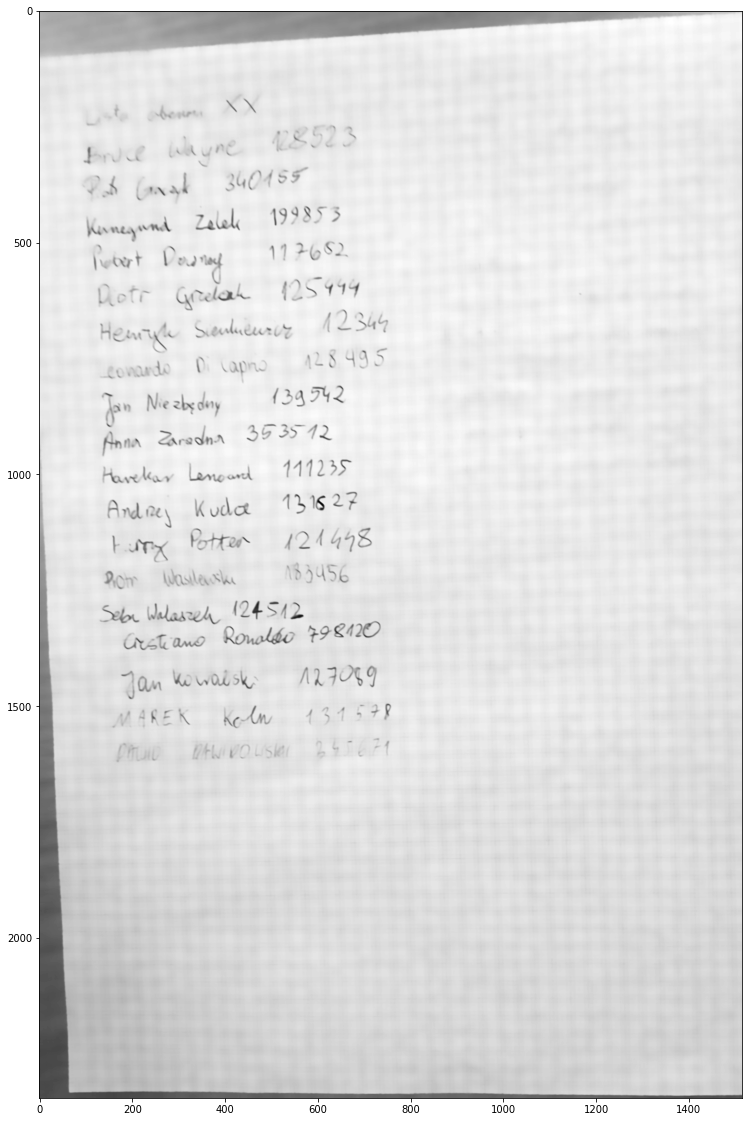

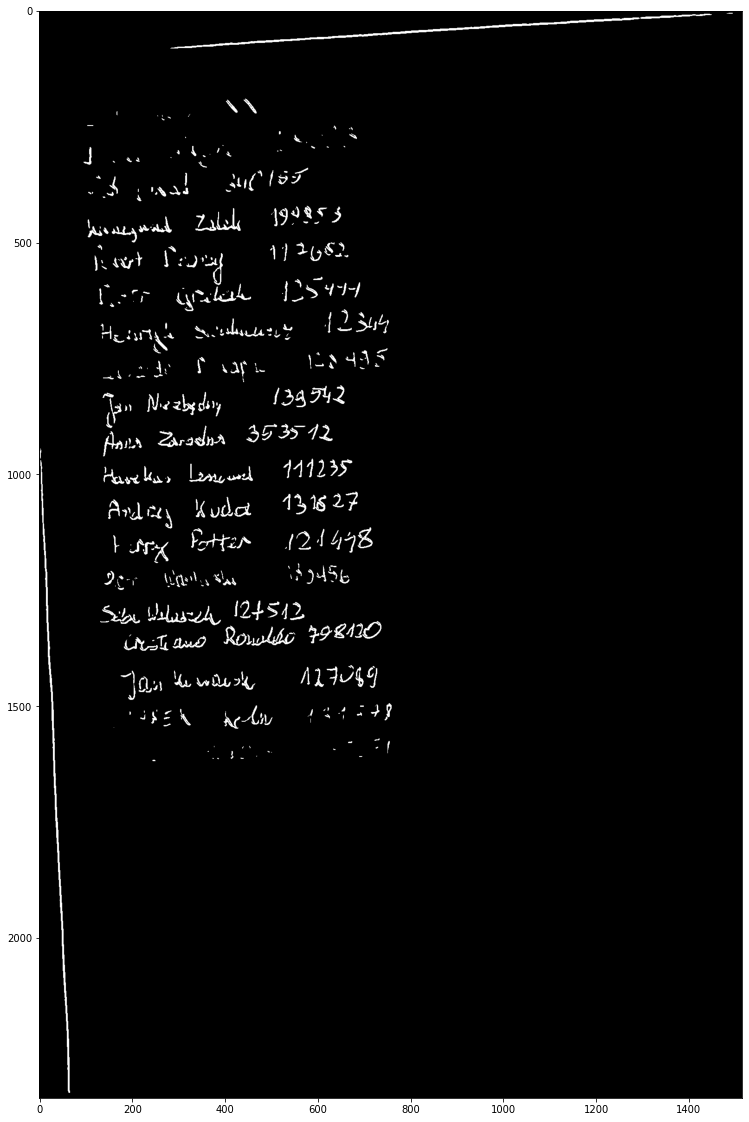

In [4]:
# https://docs.opencv.org/master/d1/d79/group__photo__denoise.html#ga4c6b0031f56ea3f98f768881279ffe93
sobel = None
image = None

for i in range(20, 40):
    image = cv.fastNlMeansDenoising(image_orig, None, i, 5, 21)

    sobelx = cv.Sobel(image, cv.CV_8U, 1, 0, ksize=3)
    sobely = cv.Sobel(image, cv.CV_8U, 0, 1, ksize=3)

    sobelx = cv.fastNlMeansDenoising(sobelx, None, 15, 5, 21)
    sobely = cv.fastNlMeansDenoising(sobely, None, 15, 5, 21)

    sobel = cv.add(sobelx, sobely)
    _, sobel = cv.threshold(sobel, 32, 255, cv.THRESH_BINARY)

    if (np.count_nonzero(sobel) / (sobel.shape[0] * sobel.shape[1])) < 0.0221:
        break

plt.figure(figsize=(20, 20))
plt.imshow(image, cmap='gray')
plt.show()

plt.figure(figsize=(20, 20))
plt.imshow(sobel, cmap='gray')
plt.show()


Detect lines

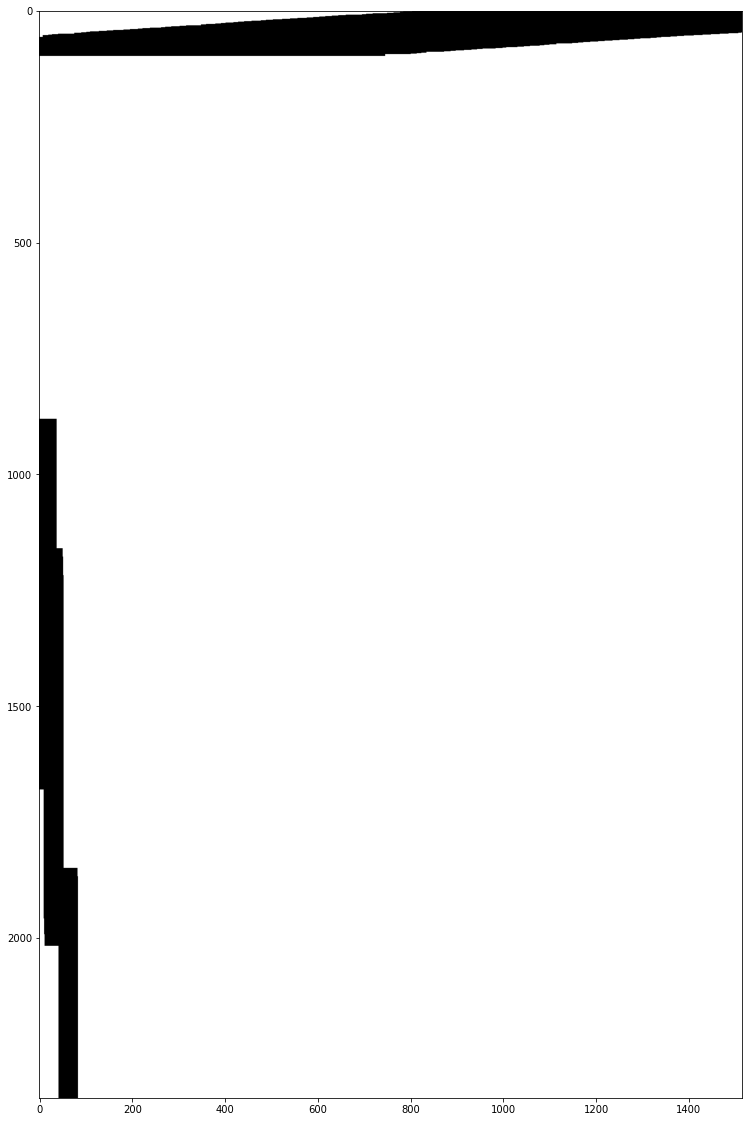

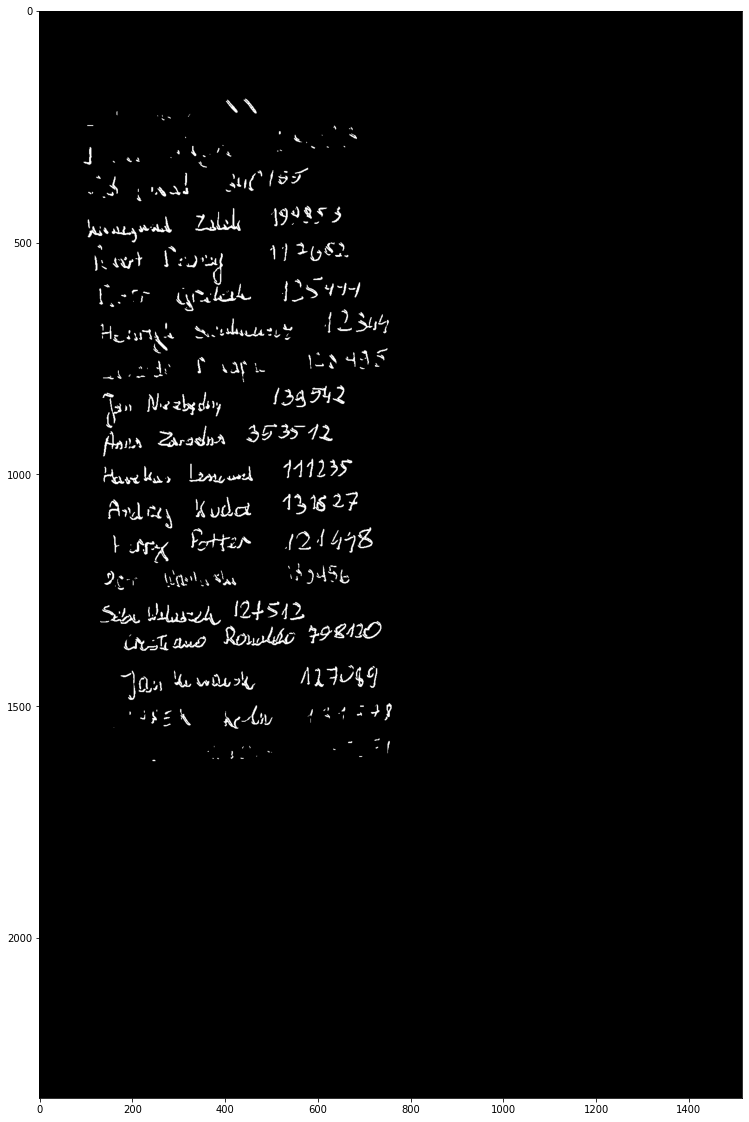

In [12]:
kernel = np.ones((1, 7), np.uint8)
erosion_1 = cv.erode(sobel, kernel, iterations=10)
kernel = np.ones((5, 80), np.uint8)
erosion_1 = cv.dilate(erosion_1, kernel, iterations=10)

kernel = np.ones((7, 1), np.uint8)
erosion_2 = cv.erode(sobel, kernel, iterations=20)
kernel = np.ones((80, 5), np.uint8)
erosion_2 = cv.dilate(erosion_2, kernel, iterations=10)

mask = np.add(erosion_1, erosion_2)
mask = cv.bitwise_not(mask)

plt.figure(figsize=(20, 20))
plt.imshow(mask, cmap='gray')
plt.show()

sobel_no_border = cv.bitwise_and(sobel, mask)
plt.figure(figsize=(20, 20))
plt.imshow(sobel_no_border, cmap='gray')
plt.show()

Save result image

In [6]:
cv.imwrite("removed_lines.png", sobel)

True

Use Laplacian edge detection (just an example, not used in main pipeline)

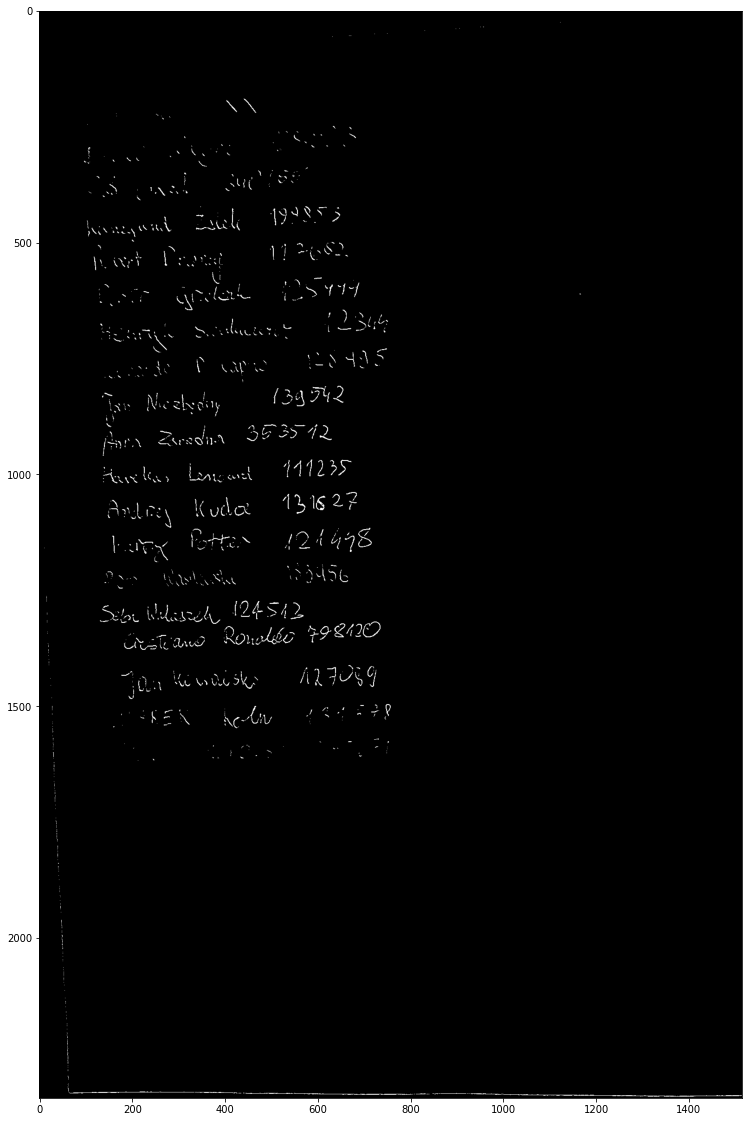

In [7]:
laplacian = cv.Laplacian(image, cv.CV_8U)

_, laplacian = cv.threshold(laplacian, 8, 255, cv.THRESH_BINARY)

plt.figure(figsize=(20, 20))
plt.imshow(laplacian, cmap='gray')
plt.show()

Denoise laplacian image

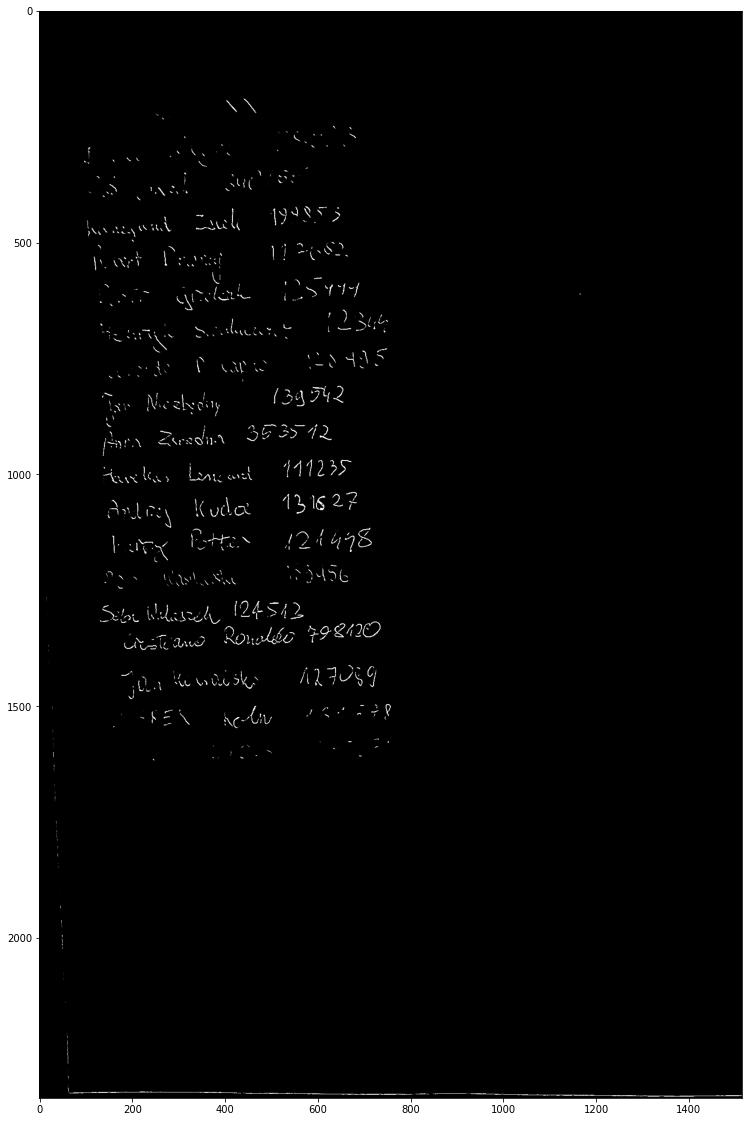

In [8]:
denoised_laplacian = cv.fastNlMeansDenoising(laplacian, None, 30, 7, 21)

plt.figure(figsize=(20, 20))
plt.imshow(denoised_laplacian, cmap='gray')
plt.show()


